# iHadCM3 isotope-enabled d18Oprecip output
## Compares seasonal means
### creates figure 6

In [8]:
# importing & loading packages & modules 

%matplotlib inline 
## Invokes mode to work cleanly with matplotlib figures
## HLB edit: %pylab inline is deprecated

from netCDF4 import Dataset as ncopen
## Used to open netCDF 

# Old import from mpl_toolkits.basemap 
#import mpl_toolkits
#from mpl_toolkits import Basemap, shiftgrid, addcyclic

# New import from Cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.gridliner as gridliner
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter # Import gridliner
import matplotlib.colors as mcolors

from matplotlib.backends.backend_pdf import PdfPages
## Used to export plots to PDF

import numpy as np
## numPy - used for scientific computing
from numpy import arange  

import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
## Helps to make figures like Matlab

import matplotlib.gridspec as gridspec
## Helps to evenly space all subplots

import datetime as dt
import pandas as pd 
import re
from matplotlib import pyplot as plt
from netCDF4 import Dataset

In [3]:
# opening netcdf file & assinging variables 

import netCDF4 as nc
import xarray as xr
# Open the NetCDF files
t_D = '/Users/hayleybricker/Documents/Climate_Modeling/Bristol/LGM/d18O/xnmfv_atmos_del18O_precip_ann_ftgridded_fsy1.nc'
t_D_pi = '/Users/hayleybricker/Documents/Climate_Modeling/Bristol/PI/d18O/xnmfa_atmos_del18O_precip_ann_ftgridded_fsy1.nc'

# Use xarray to open the files
ds_t_d = xr.open_dataset(t_D)
ds_t_d_pi = xr.open_dataset(t_D_pi)

# Print the dataset information
print(ds_t_d)
print(ds_t_d_pi)


<xarray.Dataset> Size: 29kB
Dimensions:       (lat: 73, lon: 96)
Coordinates:
  * lat           (lat) float32 292B 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * lon           (lon) float32 384B 0.0 3.75 7.5 11.25 ... 348.8 352.5 356.2
Data variables:
    d18o_allprec  (lat, lon) float32 28kB ...
<xarray.Dataset> Size: 29kB
Dimensions:       (lat: 73, lon: 96)
Coordinates:
  * lat           (lat) float32 292B 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * lon           (lon) float32 384B 0.0 3.75 7.5 11.25 ... 348.8 352.5 356.2
Data variables:
    d18o_allprec  (lat, lon) float32 28kB ...


In [4]:
# Access specific variables
d18o_allprec_t_d = ds_t_d['d18o_allprec']
d18o_allprec_t_d_pi = ds_t_d_pi['d18o_allprec']

# Slice the entire latitude, longitude, and d18o_allprec variables using [:]
lat_t_d = ds_t_d['lat'][:]
lon_t_d = ds_t_d['lon'][:]
d18o_allprec_t_d = ds_t_d['d18o_allprec'][:]

lat_t_d_pi = ds_t_d_pi['lat'][:]
lon_t_d_pi = ds_t_d_pi['lon'][:]
d18o_allprec_t_d_pi = ds_t_d_pi['d18o_allprec'][:]

In [4]:
# Check the shape of the sliced variables
print("Shape of lat_t_d:", lat_t_d.shape)
print("Shape of lon_t_d:", lon_t_d.shape)
print("Shape of d18o_allprec_t_d:", d18o_allprec_t_d.shape)

print("Shape of lat_t_d_pi:", lat_t_d_pi.shape)
print("Shape of lon_t_d_pi:", lon_t_d_pi.shape)
print("Shape of d18o_allprec_t_d_pi:", d18o_allprec_t_d_pi.shape)

Shape of lat_t_d: (73,)
Shape of lon_t_d: (96,)
Shape of d18o_allprec_t_d: (73, 96)
Shape of lat_t_d_pi: (73,)
Shape of lon_t_d_pi: (96,)
Shape of d18o_allprec_t_d_pi: (73, 96)


In [5]:
## Calculate Anomaly
# Subtract d18o_allprec_t_d_pi from d18o_allprec_t_d

diff_d18o = d18o_allprec_t_d.values - d18o_allprec_t_d_pi.values
print(diff_d18o)


[[        nan         nan         nan ...         nan         nan
          nan]
 [ -4.1201687  -4.3651676  -4.4790754 ...  -4.742073   -4.2517242
   -3.9983654]
 [ -7.080365   -7.130061   -6.992467  ...  -8.156505   -7.329196
   -6.9839907]
 ...
 [ -7.4454803  -7.389866   -7.1553726 ...  -9.380104   -8.605919
   -8.155575 ]
 [ -9.742435   -9.263992   -8.878498  ... -10.847141  -10.521381
  -10.285679 ]
 [        nan         nan         nan ...         nan         nan
          nan]]


In [5]:
# check shape of anomaly variable

shape_diff = diff_d18o.shape
print("Array Shape:", shape_diff)

Array Shape: (73, 96)


In [6]:
### calculating anomaly between modern weather station reading & LGM calculation (derived from snails)


latties = 29.03
# Longitude (0 to 360)
longies = 346.38 #13.62

d18O_modern = -4.7 # uses modern snail mean value

#Absolute values from clumped assuming 91% humidity 
d18O_clumped = -4.6
d18O_clumped_error = 1.0 #standard error 

# Anomalies: MAAT
d18O_anom = np.subtract(d18O_clumped,d18O_modern)
d18O_anom_plus_se = np.add(d18O_anom, d18O_clumped_error)
d18O_anom_minus_se = np.subtract(d18O_anom, d18O_clumped_error)


/var/folders/5w/dd80c3b92msg4cv32ztpgf4m0000gn/T/ipykernel_2787/1555158090.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('RdBu')
/Users/hayleybricker/miniconda3/envs/LGM/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/Users/hayleybricker/miniconda3/envs/LGM/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/hayleybricker/miniconda3/envs/LGM/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:475: Us

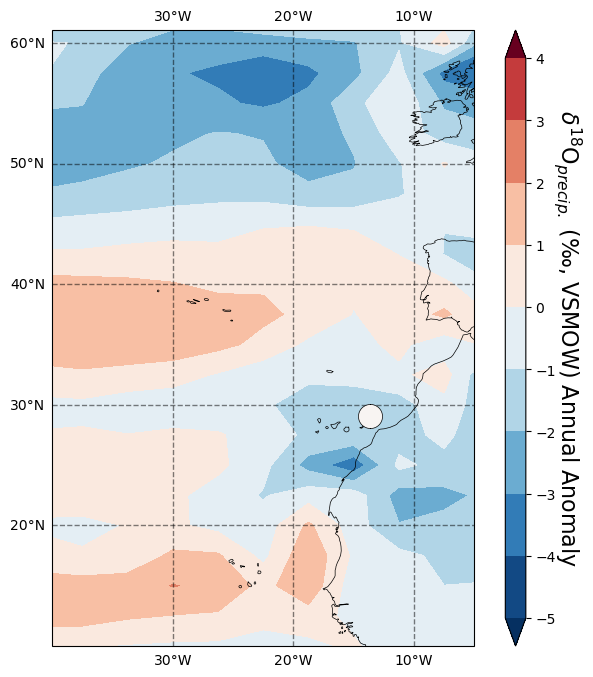

In [39]:
# plot figure
from matplotlib.ticker import MultipleLocator

fig = plt.figure(figsize=(8,8))

### Change longitude (0 to 360) and latitude bands (-90 to 90) here
x1, x2, y1, y2 = 320, 355, 10, 60

### Range in which you want your plot to go:
### low is lowest value, up is highest value, by is the increment
low = -5
up = 5
by = 1

color_map = plt.cm.get_cmap('RdBu')
reversed_color_map = color_map.reversed()
norm = mcolors.TwoSlopeNorm(vmin=low, vcenter=0, vmax=up)

# sets Cartopy projection
projection = ccrs.PlateCarree()

ax1 = plt.subplot(projection=projection)  # Create a GeoAxes on the single figure
ax1.set_extent([x1, x2, y1, y2])
cf = ax1.contourf(lon_t_d, lat_t_d, diff_d18o[:,:], arange(low, up, by), extend='both', norm=norm, cmap=reversed_color_map)

try:
    ax1.coastlines(linewidth=0.5)
except:
    pass

plt.scatter(longies, latties, c=d18O_anom, s=300, cmap=reversed_color_map, vmin=low, vmax=up, marker='o', edgecolors='black', linewidths=0.5, zorder=5)
#plt.scatter(longies, latties, c=d18O_anom_minus_se, s=300, cmap=reversed_color_map, vmin=low, vmax=up, marker=fillstyle_top, edgecolors='black', linewidths=0.5, zorder=3)
#plt.scatter(longies, latties, c=d18O_anom_plus_se, s=300, cmap=reversed_color_map, vmin=low, vmax=up, marker=fillstyle_bottom, edgecolors='black', linewidths=0.5, zorder=3)

gridlines = ax1.gridlines(draw_labels=True, linewidth=1, color='black', alpha=0.5, linestyle='--')
gridlines.xlocator = MultipleLocator(10.0)
gridlines.ylocator = MultipleLocator(10.0)

gridlines.xlabels_bottom = True
gridlines.xlabels_top = True
gridlines.ylabels_left = True
gridlines.ylabels_right = False

# Create the colorbar on the right-hand side, vertical orientation
cbar = plt.colorbar(cf, ax=ax1, orientation='vertical', pad=0.05, aspect=30)

# Set the colorbar label (rotates automatically for vertical bars)
cbar.set_label(r'$\delta^{18}$O$_{precip.}$ (‰, VSMOW) Annual Anomaly', fontsize=16, rotation=270, labelpad=20)

plt.show()

fig.savefig('/Users/hayleybricker/Documents/LGM_Canaries/Manuscript Files/Figures/PNGs/anomaly_d18O_annual.png', bbox_inches='tight', dpi=300)

fig.savefig('/Users/hayleybricker/Documents/LGM_Canaries/Manuscript Files/Figures/PDFs/anomaly_d18O_annual.pdf', bbox_inches='tight', dpi=300)



### Comparing summertime, wintertime, and annual

In [21]:
import xarray as xr

djf_d18o = xr.open_dataset('BRISTOL/xnmfv_atmos_del18O_precip_djf_fsy.nc', decode_times=False)
djf_d18o_pi = xr.open_dataset('BRISTOL/xnmfa_atmos_del18O_precip_djf_fsy.nc', decode_times=False)

jja_d18o = xr.open_dataset('/Users/hayleybricker/Documents/Climate_Modeling/Bristol/xnmfv_atmos_del18O_precip_jja_fsy.nc', decode_times=False)
jja_d18o_pi = xr.open_dataset('/Users/hayleybricker/Documents/Climate_Modeling/Bristol/xnmfa_atmos_del18O_precip_jja_fsy.nc', decode_times=False)


In [22]:
DJF_d18o = djf_d18o['d18o_allprec']
DJF_d18o_pi = djf_d18o_pi['d18o_allprec']

JJA_d18o = jja_d18o['d18o_allprec']
JJA_d18o_pi = jja_d18o_pi['d18o_allprec']


In [23]:
DJF_lat = djf_d18o['lat']
DJF_lon = djf_d18o['lon']

JJA_lat = jja_d18o['lat']
JJA_lon = jja_d18o['lon']


In [24]:
diff_DJF_d18o = DJF_d18o.values - DJF_d18o_pi.values
diff_JJA_d18o = JJA_d18o.values - JJA_d18o_pi.values


/var/folders/5w/dd80c3b92msg4cv32ztpgf4m0000gn/T/ipykernel_2787/761259157.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('RdBu')
/Users/hayleybricker/miniconda3/envs/LGM/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/Users/hayleybricker/miniconda3/envs/LGM/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/hayleybricker/miniconda3/envs/LGM/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:475: Use

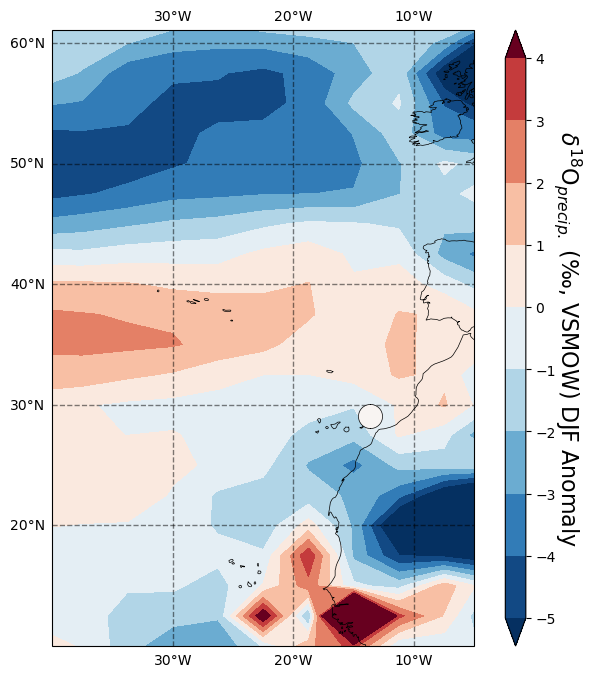

In [40]:
import matplotlib.colors as mcolors

fig = plt.figure(figsize=(8,8))

### Change longitude (0 to 360) and latitude bands (-90 to 90) here
x1, x2, y1, y2 = 320, 355, 10, 60

### Range in which you want your plot to go:
### low is lowest value, up is highest value, by is the increment
low = -5
up = 5
by = 1

color_map = plt.cm.get_cmap('RdBu')
reversed_color_map = color_map.reversed()
norm = mcolors.TwoSlopeNorm(vmin=low, vcenter=0, vmax=up)

# sets Cartopy projection
projection = ccrs.PlateCarree()

ax1 = plt.subplot(projection=projection)  # Create a GeoAxes on the single figure
ax1.set_extent([x1, x2, y1, y2])
cf = ax1.contourf(DJF_lon, DJF_lat, diff_DJF_d18o[:,:], arange(low, up, by), extend='both', norm=norm, cmap=reversed_color_map)

try:
    ax1.coastlines(linewidth=0.5)
except:
    pass

plt.scatter(longies, latties, c=d18O_anom, s=300, cmap=reversed_color_map, vmin=low, vmax=up, marker='o', edgecolors='black', linewidths=0.5, zorder=5)
#plt.scatter(longies, latties, c=d18O_anom_minus_se, s=300, cmap=reversed_color_map, vmin=low, vmax=up, marker=fillstyle_top, edgecolors='black', linewidths=0.5, zorder=3)
#plt.scatter(longies, latties, c=d18O_anom_plus_se, s=300, cmap=reversed_color_map, vmin=low, vmax=up, marker=fillstyle_bottom, edgecolors='black', linewidths=0.5, zorder=3)

gridlines = ax1.gridlines(draw_labels=True, linewidth=1, color='black', alpha=0.5, linestyle='--')
gridlines.xlocator = MultipleLocator(10.0)
gridlines.ylocator = MultipleLocator(10.0)

gridlines.xlabels_bottom = True
gridlines.xlabels_top = True
gridlines.ylabels_left = True
gridlines.ylabels_right = False

# Create the colorbar on the right-hand side, vertical orientation
cbar = plt.colorbar(cf, ax=ax1, orientation='vertical', pad=0.05, aspect=30)

# Set the colorbar label (rotates automatically for vertical bars)
cbar.set_label(r'$\delta^{18}$O$_{precip.}$ (‰, VSMOW) DJF Anomaly', fontsize=16, rotation=270, labelpad=20)

plt.show()


/var/folders/5w/dd80c3b92msg4cv32ztpgf4m0000gn/T/ipykernel_2787/2663001493.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('RdBu')
/Users/hayleybricker/miniconda3/envs/LGM/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/Users/hayleybricker/miniconda3/envs/LGM/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/hayleybricker/miniconda3/envs/LGM/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:475: Us

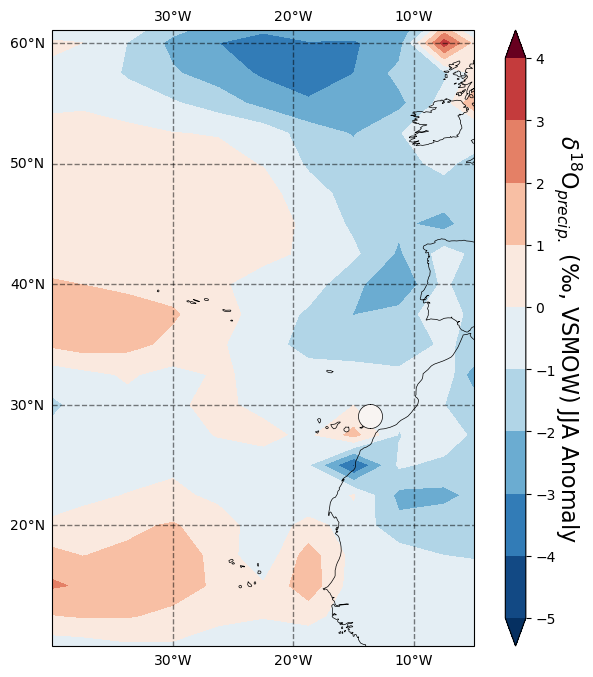

In [41]:
fig = plt.figure(figsize=(8,8))

### Change longitude (0 to 360) and latitude bands (-90 to 90) here
x1, x2, y1, y2 = 320, 355, 10, 60

### Range in which you want your plot to go:
### low is lowest value, up is highest value, by is the increment
low = -5
up = 5
by = 1

color_map = plt.cm.get_cmap('RdBu')
reversed_color_map = color_map.reversed()
norm = mcolors.TwoSlopeNorm(vmin=low, vcenter=0, vmax=up)

# sets Cartopy projection
projection = ccrs.PlateCarree()

ax1 = plt.subplot(projection=projection)  # Create a GeoAxes on the single figure
ax1.set_extent([x1, x2, y1, y2])
cf = ax1.contourf(JJA_lon, JJA_lat, diff_JJA_d18o[:,:], arange(low, up, by), extend='both', norm=norm, cmap=reversed_color_map)

try:
    ax1.coastlines(linewidth=0.5)
except:
    pass

plt.scatter(longies, latties, c=d18O_anom, s=300, cmap=reversed_color_map, vmin=low, vmax=up, marker='o', edgecolors='black', linewidths=0.5, zorder=5)
#plt.scatter(longies, latties, c=d18O_anom_minus_se, s=300, cmap=reversed_color_map, vmin=low, vmax=up, marker=fillstyle_top, edgecolors='black', linewidths=0.5, zorder=3)
#plt.scatter(longies, latties, c=d18O_anom_plus_se, s=300, cmap=reversed_color_map, vmin=low, vmax=up, marker=fillstyle_bottom, edgecolors='black', linewidths=0.5, zorder=3)

gridlines = ax1.gridlines(draw_labels=True, linewidth=1, color='black', alpha=0.5, linestyle='--')
gridlines.xlocator = MultipleLocator(10.0)
gridlines.ylocator = MultipleLocator(10.0)

gridlines.xlabels_bottom = True
gridlines.xlabels_top = True
gridlines.ylabels_left = True
gridlines.ylabels_right = False

# Create the colorbar on the right-hand side, vertical orientation
cbar = plt.colorbar(cf, ax=ax1, orientation='vertical', pad=0.05, aspect=30)

# Set the colorbar label (rotates automatically for vertical bars)
cbar.set_label(r'$\delta^{18}$O$_{precip.}$ (‰, VSMOW) JJA Anomaly', fontsize=16, rotation=270, labelpad=20)

plt.show()

In [34]:
### This chunk of code is used to extract climate model data at certain points.
### Input your latitude and longitude of interest here.  
p_latties = 29.03
p_longies = 346.38

### Models are at different resolutions. This function finds the nearest grid cell
### to your point in each model.
def geo_idx(dd, dd_array):
   """
     search for nearest decimal degree in an array of decimal degrees and return the index.
     np.argmin returns the indices of minium value along an axis.
     so subtract dd from all values in dd_array, take absolute value and find index of minium.
    """
   geo_idx = (np.abs(dd_array - dd)).argmin()
   return geo_idx


lat_idx_d = geo_idx(lat_t_d, latties)
lon_idx_d = geo_idx(lon_t_d, longies)


### This prints out the temperature, precipitation, and evaporation anomalies for each model
### You can copy and paste the output in excel.
print('d18O anomaly (LGM-PI)')
print(diff_d18o[lat_idx_d,lon_idx_d])
print(diff_DJF_d18o[lat_idx_d,lon_idx_d])
print(diff_JJA_d18o[lat_idx_d,lon_idx_d])


d18O anomaly (LGM-PI)
-1.6277938
-0.9256563
-0.027518868
